<a href="https://colab.research.google.com/github/akshan-main/Semmelweis/blob/main/Semmelweis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)

yearly <- read_csv("yearly_deaths_by_clinic.csv")

yearly

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


In [3]:
yearly<-yearly %>% mutate(proportion_deaths=deaths/births)

yearly

year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


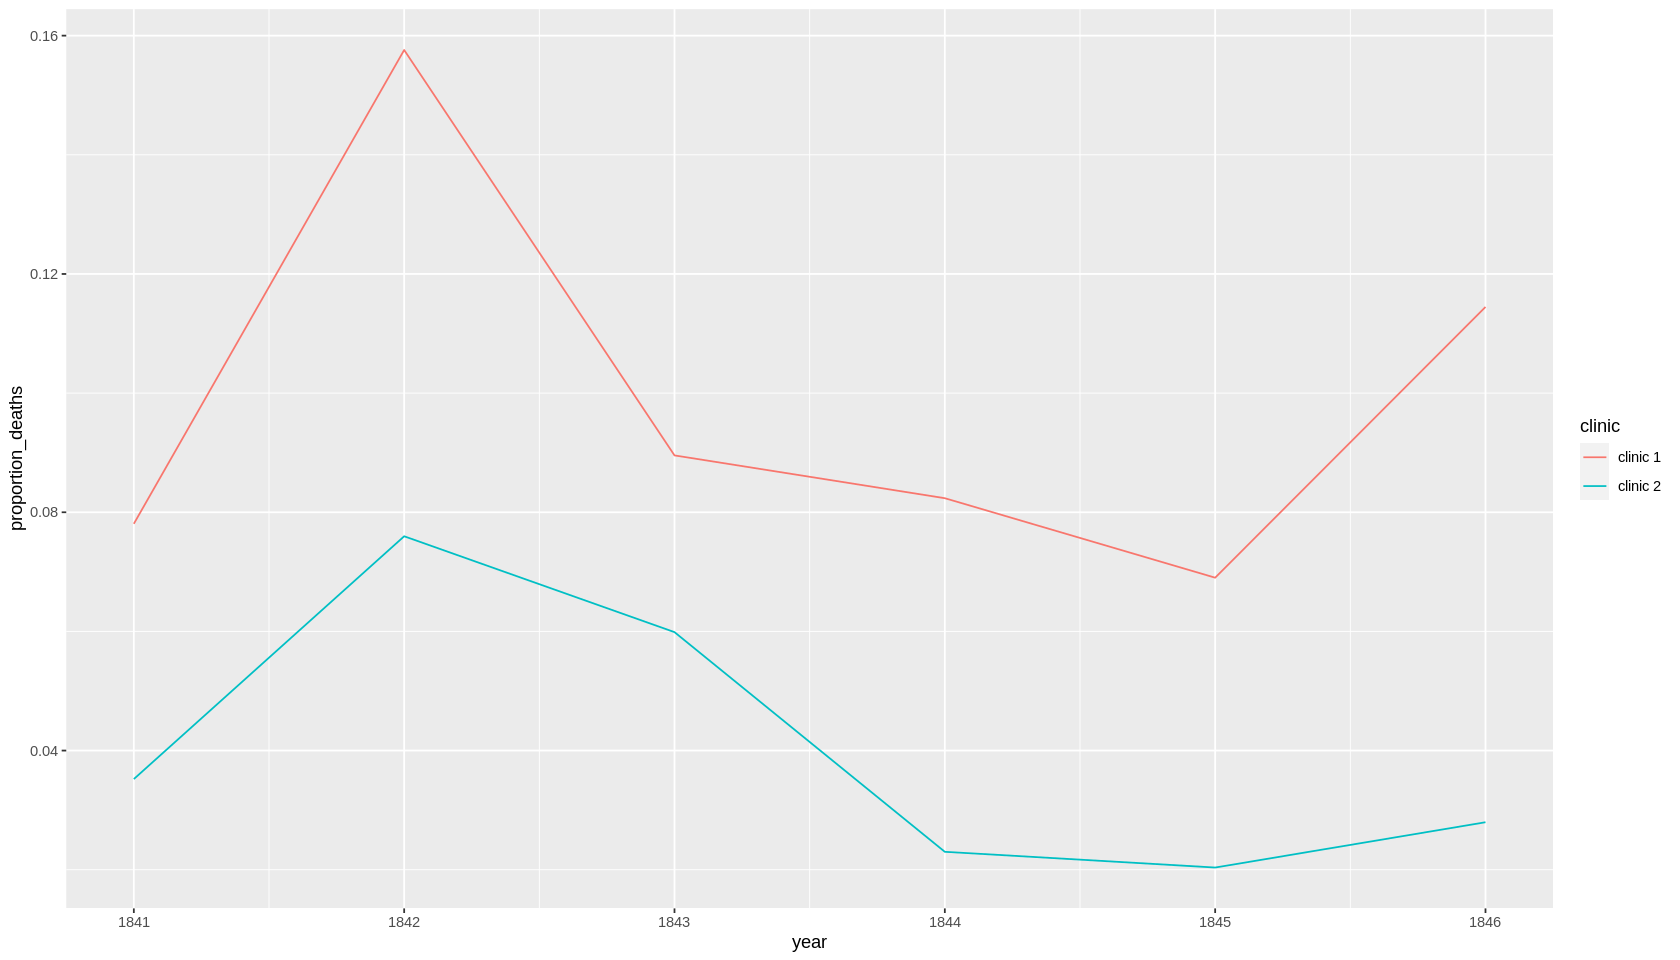

In [8]:
options(repr.plot.width=14, repr.plot.height=8)

ggplot(yearly,aes(x=year,y=proportion_deaths,color=clinic))+geom_line()

In [9]:
monthly <- read_csv("monthly_deaths.csv")

monthly<- monthly %>% mutate(proportion_deaths=deaths/births)

head(monthly)

Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000


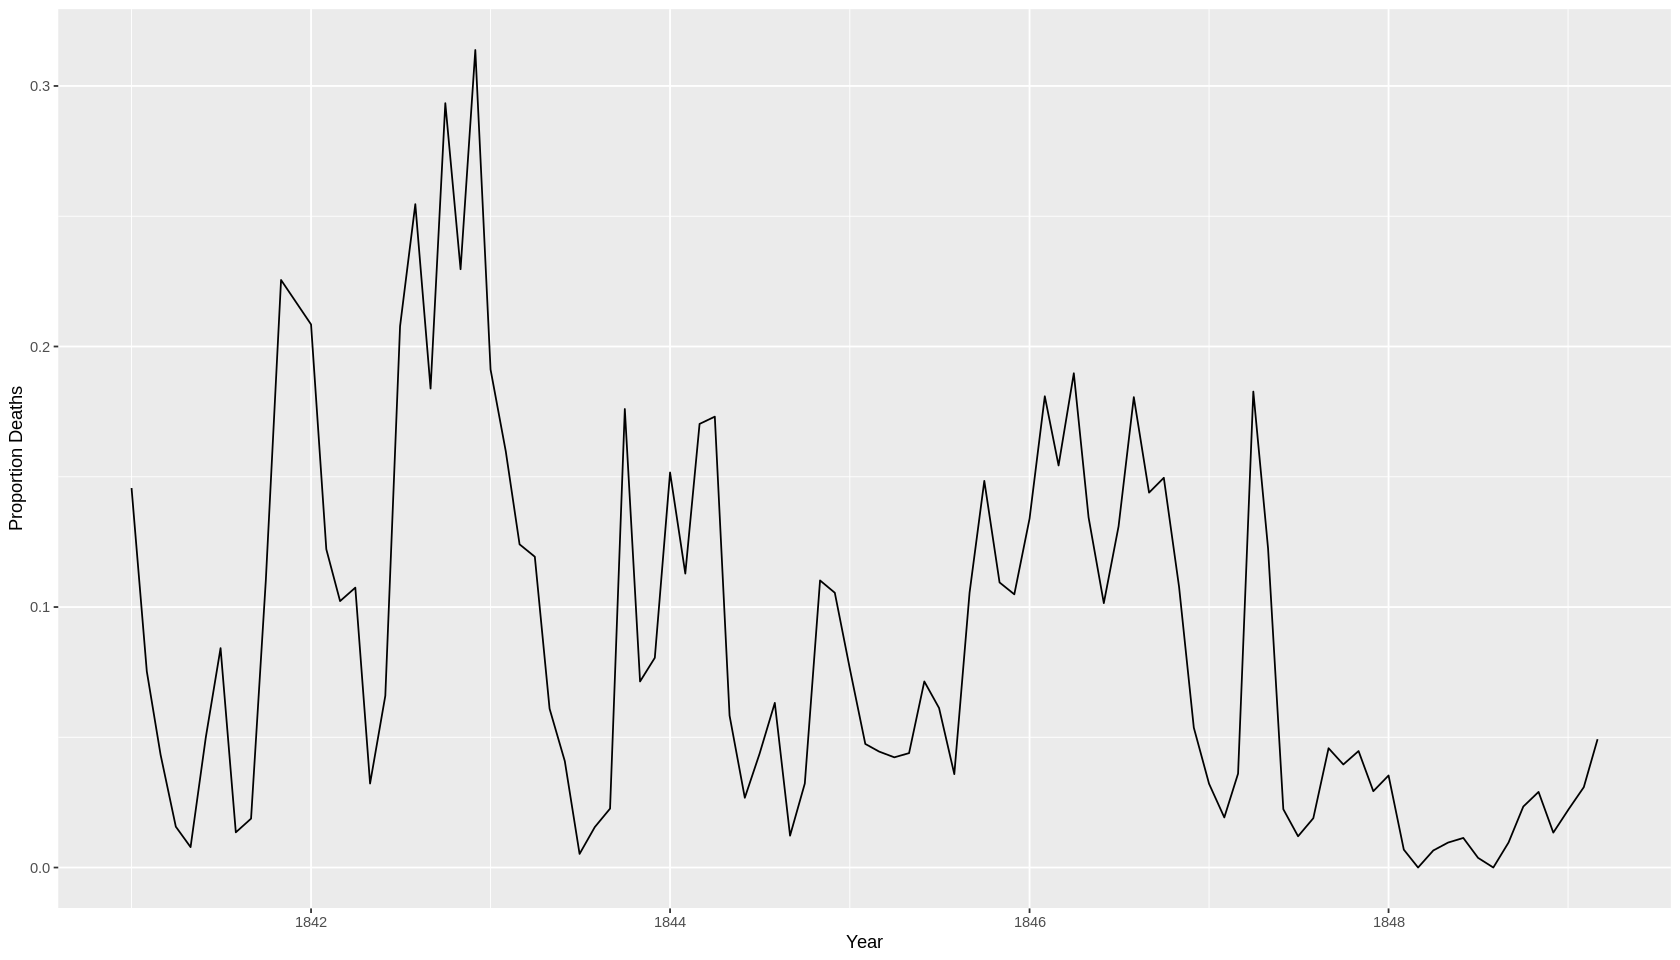

In [10]:
ggplot(monthly,aes(x=date,y=proportion_deaths))+geom_line()+labs(x="Year",y="Proportion Deaths")

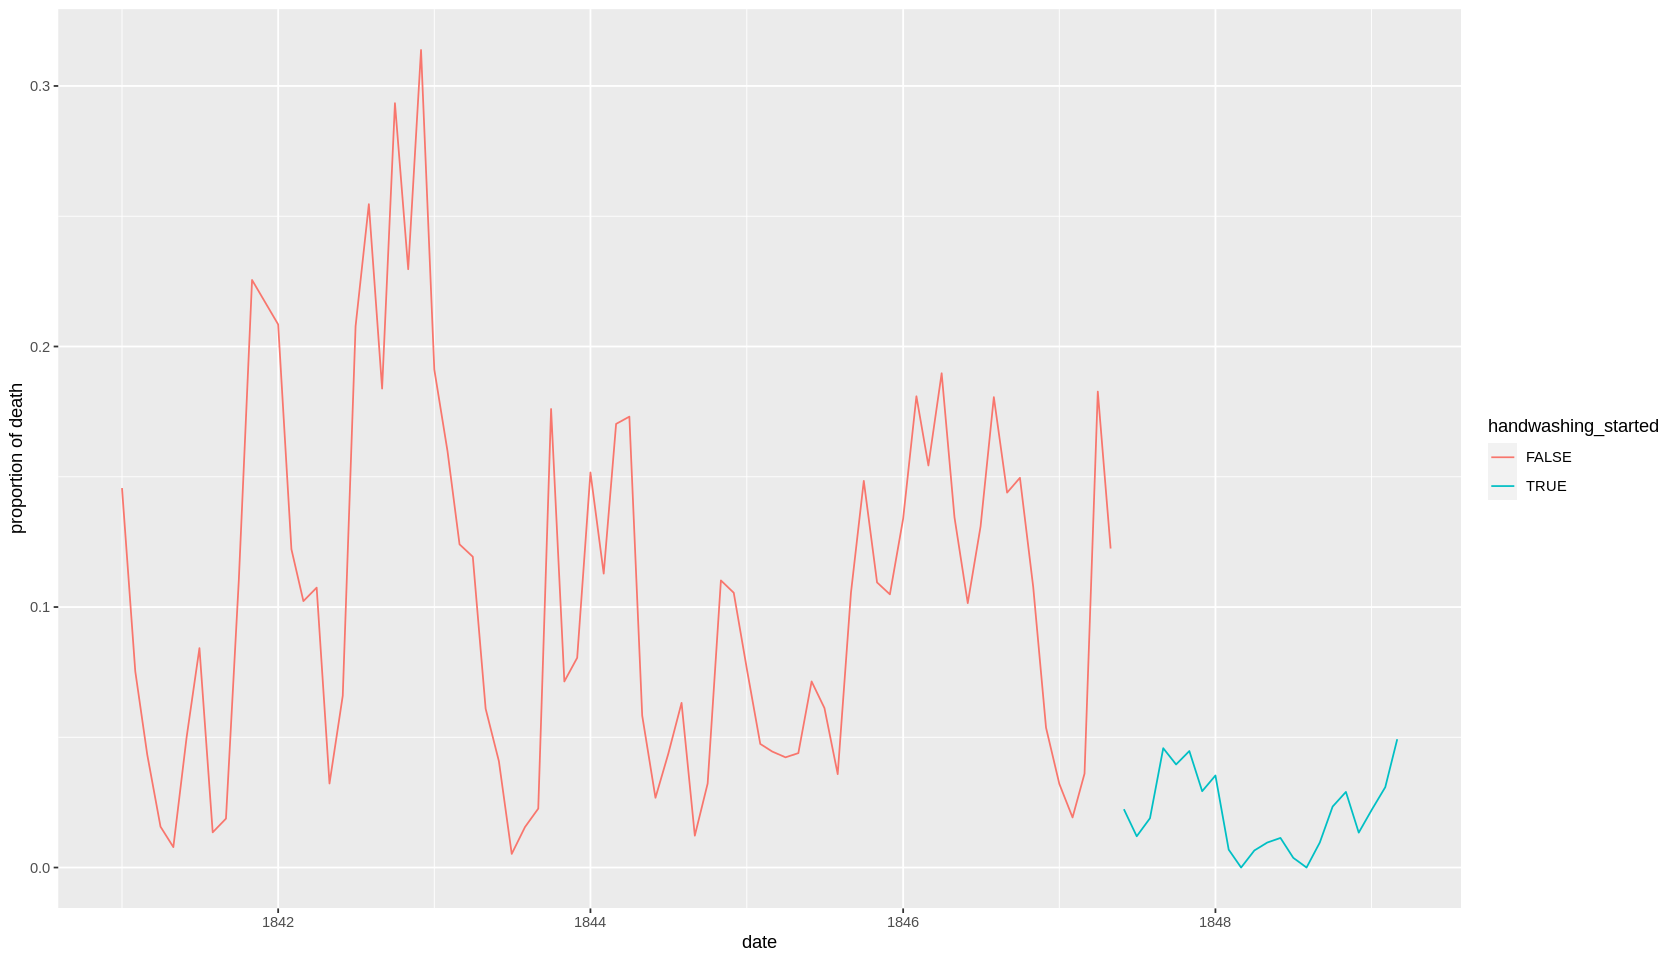

In [11]:
handwashing_start = as.Date('1847-06-01')

monthly <- monthly %>% mutate(handwashing_started=date>=handwashing_start)

ggplot(monthly,aes(x=date,y=proportion_deaths,color=handwashing_started))+geom_line()+labs(x="date",y="proportion of death")

In [12]:
monthly_summary <- monthly %>% group_by(handwashing_started) %>% summarize(abcd = mean(proportion_deaths))

monthly_summary

handwashing_started,abcd
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


In [13]:
test_result <- t.test( proportion_deaths ~ handwashing_started , data = monthly)
test_result


	Welch Two Sample t-test

data:  proportion_deaths by handwashing_started
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.10504998          0.02109338 


In [ ]:
# if doctors didn't wash their hands, it increased the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval